In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 6.9MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-cp37-none-any.whl size=31633 sha256=d92e5b6a8e683e793c527f2ee740892e901fd79a1bc1404454283604716bfe99
  Stored in directory: /root/.cache/pip/wheels/3b/5c/fa/92ee330d259e8fa5bedbd53f67040710fe81cfa463b8711d26
Successfully built libarchive


In [ ]:
!unzip /content/150k_plus_0808.zip

Archive:  /content/150k_plus_0808.zip
   creating: 150k plus 0808/
  inflating: 150k plus 0808/PPP Loan Data - Key Aspects 08212020.pdf  
   creating: __MACOSX/
   creating: __MACOSX/150k plus 0808/
  inflating: __MACOSX/150k plus 0808/._PPP Loan Data - Key Aspects 08212020.pdf  
  inflating: 150k plus 0808/PPP Data 150k plus 080820.csv  
  inflating: __MACOSX/150k plus 0808/._PPP Data 150k plus 080820.csv  


In [ ]:
!ls

'150k plus 0808'   150k_plus_0808.zip   __MACOSX   sample_data


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv("/content/150k plus 0808/PPP Data 150k plus 080820.csv")
print(df.shape)
df.head()

(662515, 16)


,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662515 entries, 0 to 662514
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanRange      662515 non-null  object 
 1   BusinessName   662510 non-null  object 
 2   Address        662498 non-null  object 
 3   City           662500 non-null  object 
 4   State          662499 non-null  object 
 5   Zip            662499 non-null  float64
 6   NAICSCode      655800 non-null  float64
 7   BusinessType   661110 non-null  object 
 8   RaceEthnicity  662515 non-null  object 
 9   Gender         662515 non-null  object 
 10  Veteran        662515 non-null  object 
 11  NonProfit      41993 non-null   object 
 12  JobsReported   622635 non-null  float64
 13  DateApproved   662515 non-null  object 
 14  Lender         662515 non-null  object 
 15  CD             662292 non-null  object 
dtypes: float64(3), object(13)
memory usage: 80.9+ MB


In [ ]:
df.isnull().sum()

LoanRange             0
BusinessName          5
Address              17
City                 15
State                16
Zip                  16
NAICSCode          6715
BusinessType       1405
RaceEthnicity         0
Gender                0
Veteran               0
NonProfit        620522
JobsReported      39880
DateApproved          0
Lender                0
CD                  223
dtype: int64

In [ ]:
df.columns

Index(['LoanRange', 'BusinessName', 'Address', 'City', 'State', 'Zip',
       'NAICSCode', 'BusinessType', 'RaceEthnicity', 'Gender', 'Veteran',
       'NonProfit', 'JobsReported', 'DateApproved', 'Lender', 'CD',
       'loan_lower', 'loan_upper', 'date_approved_dt', 'loan_avg'],
      dtype='object')

In [ ]:
df.dtypes

LoanRange         object
BusinessName      object
Address           object
City              object
State             object
Zip              float64
NAICSCode        float64
BusinessType      object
RaceEthnicity     object
Gender            object
Veteran           object
NonProfit         object
JobsReported     float64
DateApproved      object
Lender            object
CD                object
dtype: object

In [ ]:
df.tail(40)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
662475,"e $150,000-350,000",WSG HOLDCO LLC,255 BUFFALO WAY,JACKSON,WY,83001.0,541611.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,19.0,04/29/2020,Bank of Jackson Hole,WY-00
662476,"e $150,000-350,000","WY-TAX ENTERPRISES, INC",2635 E 2nd St,Casper,WY,82609.0,541213.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,04/30/2020,Bank of the West,WY-00
662477,"e $150,000-350,000",WYO D CONSTRUCTION LLC,PO Box 118,La Barge,WY,83123.0,999990.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,10.0,04/30/2020,Bank of the West,WY-00
662478,"e $150,000-350,000","WYO SERVICES, LLC",PO BOX 761,UPTON,WY,82730.0,238990.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,04/07/2020,FirsTier Bank,WY-00
662479,"e $150,000-350,000",WYOMING AUTO INVESTMENTS LLC,1172 16th Street,CODY,WY,82414.0,441110.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,27.0,04/03/2020,Stockman Bank of Montana,WY-00
662480,"e $150,000-350,000","WYOMING BEARING & SUPPLY, LLC",206 s COLLEGE DR,CHEYENNE,WY,82007.0,454390.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,20.0,04/03/2020,Platte Valley Bank,WY-00
662481,"e $150,000-350,000",WYOMING CHEESE LLC,807 BARNUM RD,KAYCEE,WY,82639.0,311513.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,28.0,04/27/2020,Hilltop National Bank,WY-00
662482,"e $150,000-350,000",WYOMING COMMUNITY FOUNDATION,1472 N 5th St Suite 201,LARAMIE,WY,82072.0,813211.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,18.0,04/10/2020,First Interstate Bank,WY-00
662483,"e $150,000-350,000","WYOMING ELECTRIC, INC.",15 GABLE WAY,SHERIDAN,WY,82801.0,238210.0,Corporation,White,Male Owned,Non-Veteran,NaN,12.0,04/07/2020,First Northern Bank of Wyoming,WY-00
662484,"e $150,000-350,000","WYOMING FABRICATION ENTERPRISES, INC.",4748 Highway 89 N,EVANSTON,WY,82930.0,332999.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,14.0,04/09/2020,Glacier Bank,WY-00


In [ ]:
df.head(40)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05
5,"e $150,000-350,000",CHURCH SQUARE PHARMACY INC,NaN,NaN,NaN,NaN,424210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
6,"e $150,000-350,000",FERNANDINA BEACH HOTEL GROUP LLC,NaN,NaN,NaN,NaN,721110.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
7,"e $150,000-350,000",FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,Saint Johns,NaN,32259.0,813110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,89.0,05/03/2020,Synovus Bank,FL-04
8,"e $150,000-350,000",HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,326199.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
9,"e $150,000-350,000",MIAMITOWN AUTO PARTS AND RECYCLING INC,NaN,NaN,NaN,NaN,423140.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN


In [60]:
df.LoanRange.unique()

array(['d $350,000-1 million', 'e $150,000-350,000', 'a $5-10 million',
       'b $2-5 million', 'c $1-2 million'], dtype=object)

In [61]:
loan_range = {
    "a $5-10 million": {"lower": 5000000, "upper": 10000000},
    "b $2-5 million": {"lower": 2000000, "upper": 5000000},
    "c $1-2 million": {"lower": 1000000, "upper":2000000},
    "d $350,000-1 million": {"lower": 350000, "upper":1000000},
    "e $150,000-350,000" : {"lower": 150000, "upper":350000}
}
df['loan_lower'] = df.LoanRange.apply(lambda x: loan_range[x]["lower"])
df['loan_upper'] = df.LoanRange.apply(lambda x: loan_range[x]["upper"])

In [62]:
df["date_approved_dt"] = pd.to_datetime(df["DateApproved"]).values

In [63]:
df.BusinessType.unique()

array([nan, 'Non-Profit Organization', 'Corporation',
       'Sole Proprietorship', 'Subchapter S Corporation',
       'Limited  Liability Company(LLC)', 'Cooperative', 'Partnership',
       'Professional Association', 'Employee Stock Ownership Plan(ESOP)',
       'Joint Venture', 'Limited Liability Partnership', 'Trust',
       'Self-Employed Individuals', 'Non-Profit Childcare Center',
       'Independent Contractors', 'Tenant in Common',
       'Rollover as Business Start-Ups (ROB'], dtype=object)

In [64]:
df.State.unique()

array([nan, 'AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY'], dtype=object)

In [65]:
df.City.unique()

array([nan, 'SEATTLE', 'SAN BERNARDINO', ..., 'BANNER', 'La Barge',
       'KIRBY'], dtype=object)

In [66]:
df.RaceEthnicity.unique()

array(['Unanswered', 'American Indian or Alaska Native', 'White',
       'Black or African American', 'Asian', 'Hispanic', 'Multi Group',
       'Puerto Rican'], dtype=object)

In [67]:
df["loan_avg"] = (df['loan_upper'] + df['loan_lower'])/2


NO of loan per Business Type

In [ ]:
loan_per_business = pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts())

In [ ]:
national_avg=np.mean(df["loan_avg"])
print("National Average of Loan amounts is {} $".format(np.floor(national_avg))) 

National Average of Loan amounts is 649256.0 $


Loan Average By State

In [ ]:
df_loan_avg_by_state = pd.DataFrame(df.groupby('State').apply(lambda x: np.mean(x['loan_avg'])))

In [ ]:
df_loan_avg_by_state.sort_values(by=0, ascending=False, inplace=True)
df_loan_avg_by_state.head()

,0
State,
KS,706903.428377
DC,704964.412811
MN,703225.982533
IL,698139.043665
IA,698077.568838


In [ ]:
print("State with maximum loan amount average are:")
df_loan_avg_by_state.head(3)

State with maximum loan amount average are:


,0
State,
KS,706903.428377
DC,704964.412811
MN,703225.982533


In [ ]:
print("State with minimum loan amount average are:")
df_loan_avg_by_state.tail(3)

State with minimum loan amount average are:


,0
State,
GU,514965.397924
VI,476445.086705
AS,377500.000000


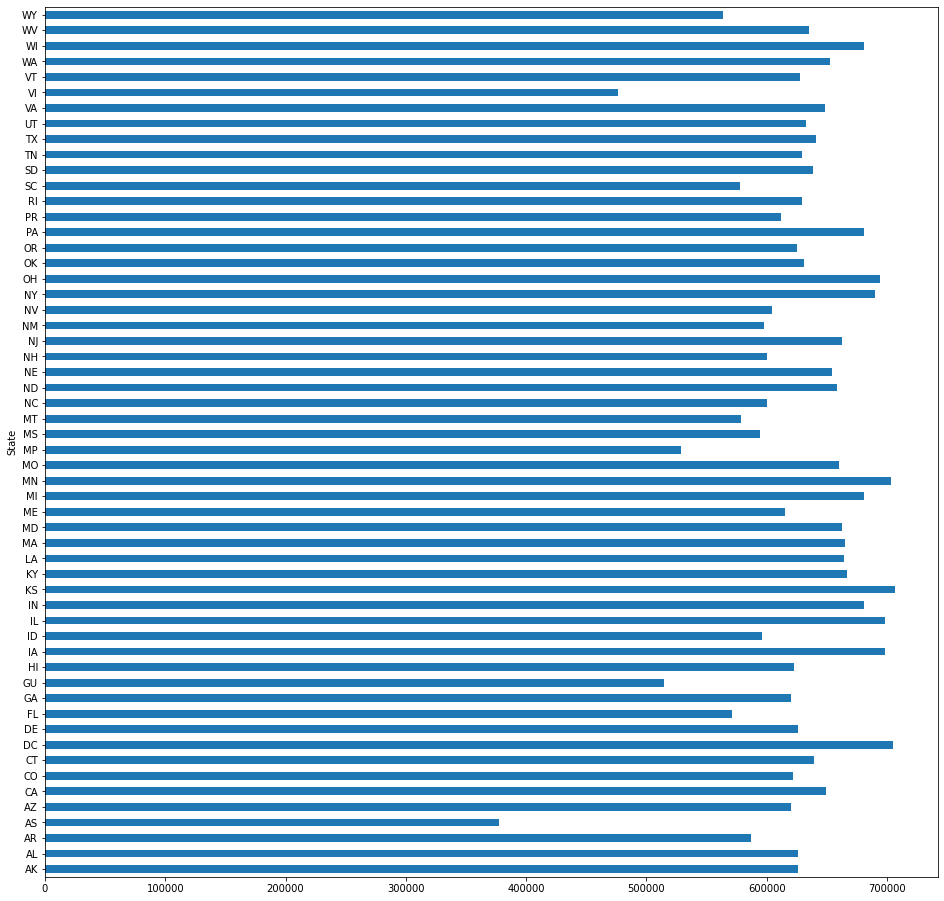

In [ ]:
plt.figure(figsize=(16,16))
df.groupby('State').apply(lambda x: np.mean(x['loan_avg'])).plot.barh()

**National Average of Loan AMT = 649256 $**

State with Highest AVG Of loan Amt.:
1. KS 	706903.428377
2. DC 	704964.412811
3. MN 	703225.982533

State with Lowest AVG of Loam Amt:

1. AS 	377500.000000
2. VI 	476445.086705
3. GU 	514965.397924

**DF LOAN AVG BY CITY**

In [ ]:
df_loan_avg_by_city = pd.DataFrame(df.groupby('City').apply(lambda x: np.mean(x['loan_avg'])))
df_loan_avg_by_city.sort_values(by=0, ascending=False, inplace=True)
df_loan_avg_by_city.head()


,0
City,
RETSOF,7500000.0
"FAR ROCKAWAY NYC,",7500000.0
Martins Ferry,7500000.0
New York City,7500000.0
Providnce,7500000.0


In [ ]:
df_loan_avg_by_city.shape

(24513, 1)

In [ ]:
print("State with maximum loan amount average are:")
df_loan_avg_by_city.head(3)

State with maximum loan amount average are:


,0
City,
RETSOF,7500000.0
"FAR ROCKAWAY NYC,",7500000.0
Martins Ferry,7500000.0


In [ ]:
print("State with minimum loan amount average are:")
df_loan_avg_by_city.tail(3)

State with minimum loan amount average are:


,0
City,
KUNKLETOWN,250000.0
KURTISTOWN,250000.0
", Albany",250000.0


city wise distribution of loan amt 

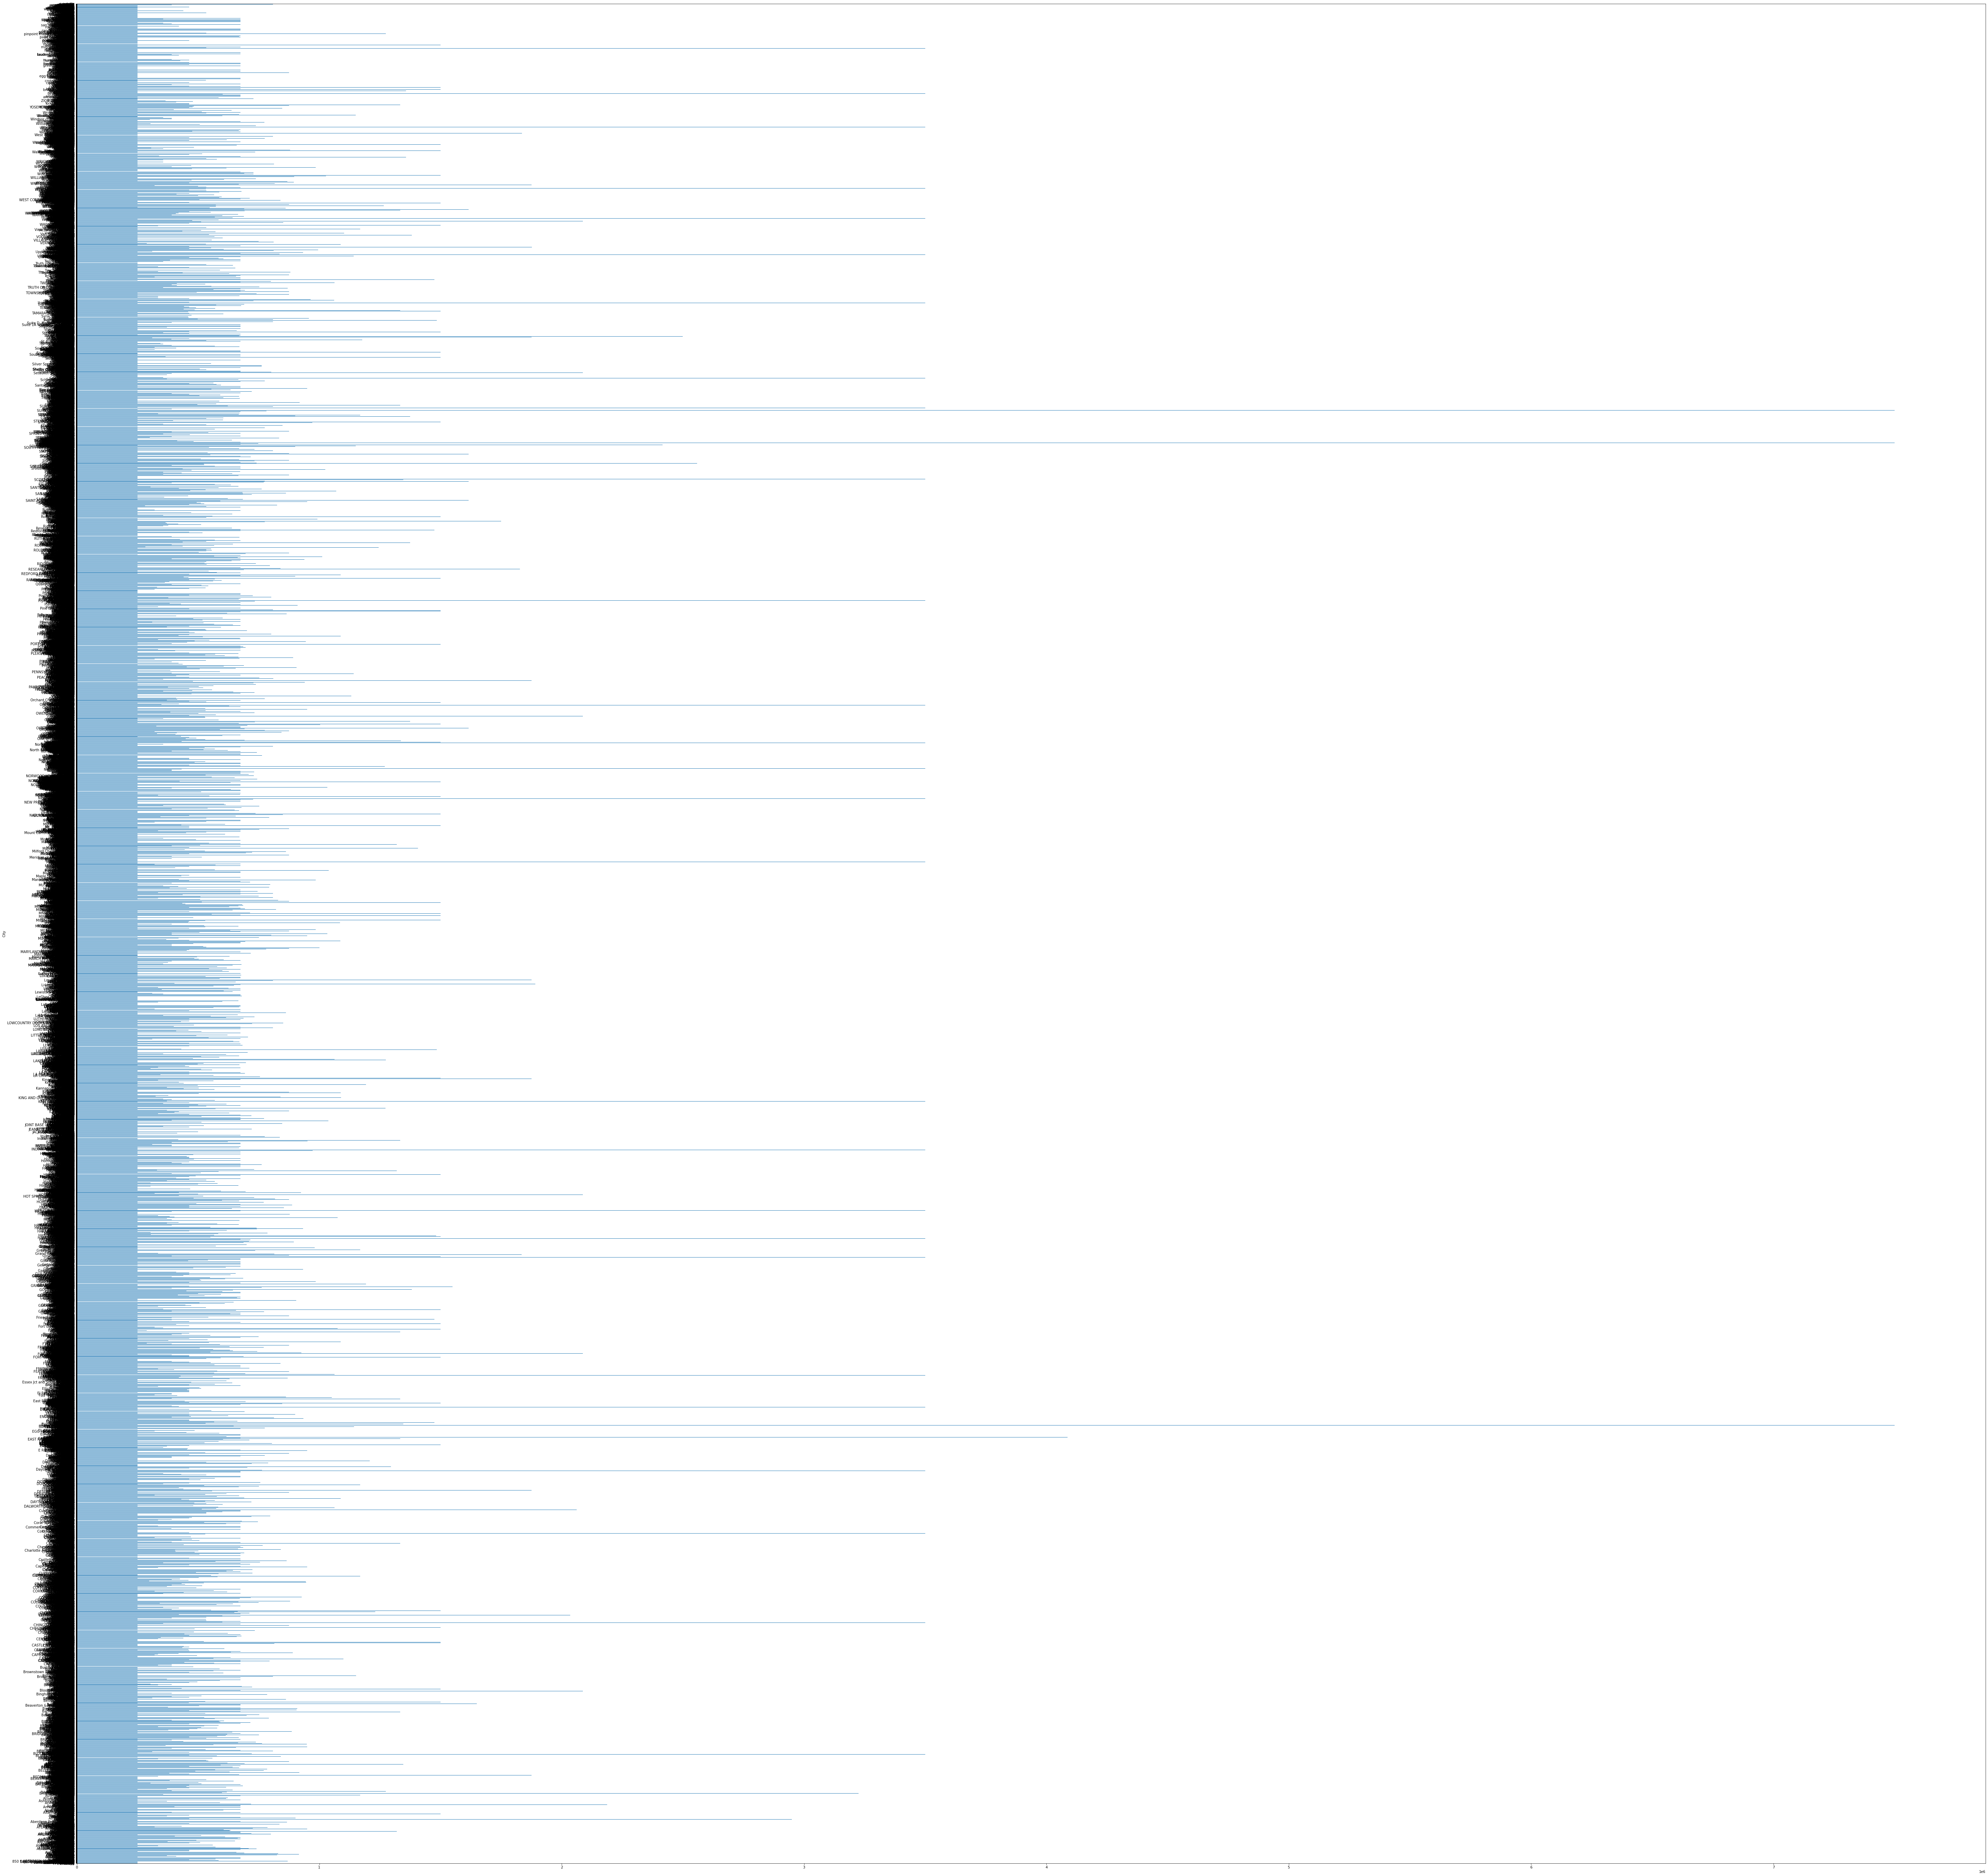

In [ ]:
plt.figure(figsize=(100,100))
df.groupby('City').apply(lambda x: np.mean(x['loan_avg'])).plot.barh()

**ANALYSIS BY AVG LOAN AMT OF CITY**


**National Average of Loan AMT = 649256 $**

CITY with Highest AVG Of loan Amt.:
1. RETSOF 	7500000.0
2. FAR ROCKAWAY NYC 	7500000.0
3. Martins Ferry 	7500000.0

CITY with Lowest AVG of Loam Amt:

1. KUNKLETOWN 	250000.0
2. KURTISTOWN 	250000.0
3. Albany 	     250000.0

**HIGHEST LOAN LANDER IN EACH CITY**


**ANALYSIS BASED ON LOAN AVG vs Business Type**

No of Loan based on Business type

In [68]:
pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts())

,BusinessType
Corporation,279862
Limited Liability Company(LLC),172990
Subchapter S Corporation,128787
Non-Profit Organization,41364
Partnership,12771
Sole Proprietorship,8808
Limited Liability Partnership,8054
Professional Association,4257
Cooperative,1840
Self-Employed Individuals,711


<Figure size 3600x1152 with 0 Axes>

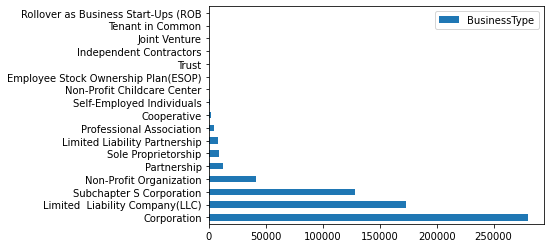

In [ ]:
plt.figure(figsize=(50,16))
pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts()).plot.barh()

**Sum of Loan by Bussiness Type**

In [ ]:
df_loan_business=pd.DataFrame(df.groupby('BusinessType').apply(lambda x: np.sum(x['loan_avg'])))
df_loan_business.sort_values(by=0, ascending=False, inplace=True)
df_loan_business.head()


,0
BusinessType,
Corporation,1.786339e+11
Limited Liability Company(LLC),1.051504e+11
Subchapter S Corporation,8.520952e+10
Non-Profit Organization,3.551952e+10
Partnership,8.716650e+09


In [ ]:
df_loan_business.head(3)

,0
BusinessType,
Corporation,1.786339e+11
Limited Liability Company(LLC),1.051504e+11
Subchapter S Corporation,8.520952e+10


In [ ]:
df_loan_business.tail(3)

,0
BusinessType,
Joint Venture,63950000.0
Tenant in Common,9050000.0
Rollover as Business Start-Ups (ROB,1600000.0


Analysis Loan by business type

Max - 
1. Corporation 	1.786339e+11
2. Limited Liability Company(LLC) 	1.051504e+11
3. Subchapter S Corporation 	8.520952e+10



Minimum
1. Joint Venture 	63950000.0
2. Tenant in Common 	9050000.0
3. Rollover as Business Start-Ups (ROB 	1600000.0

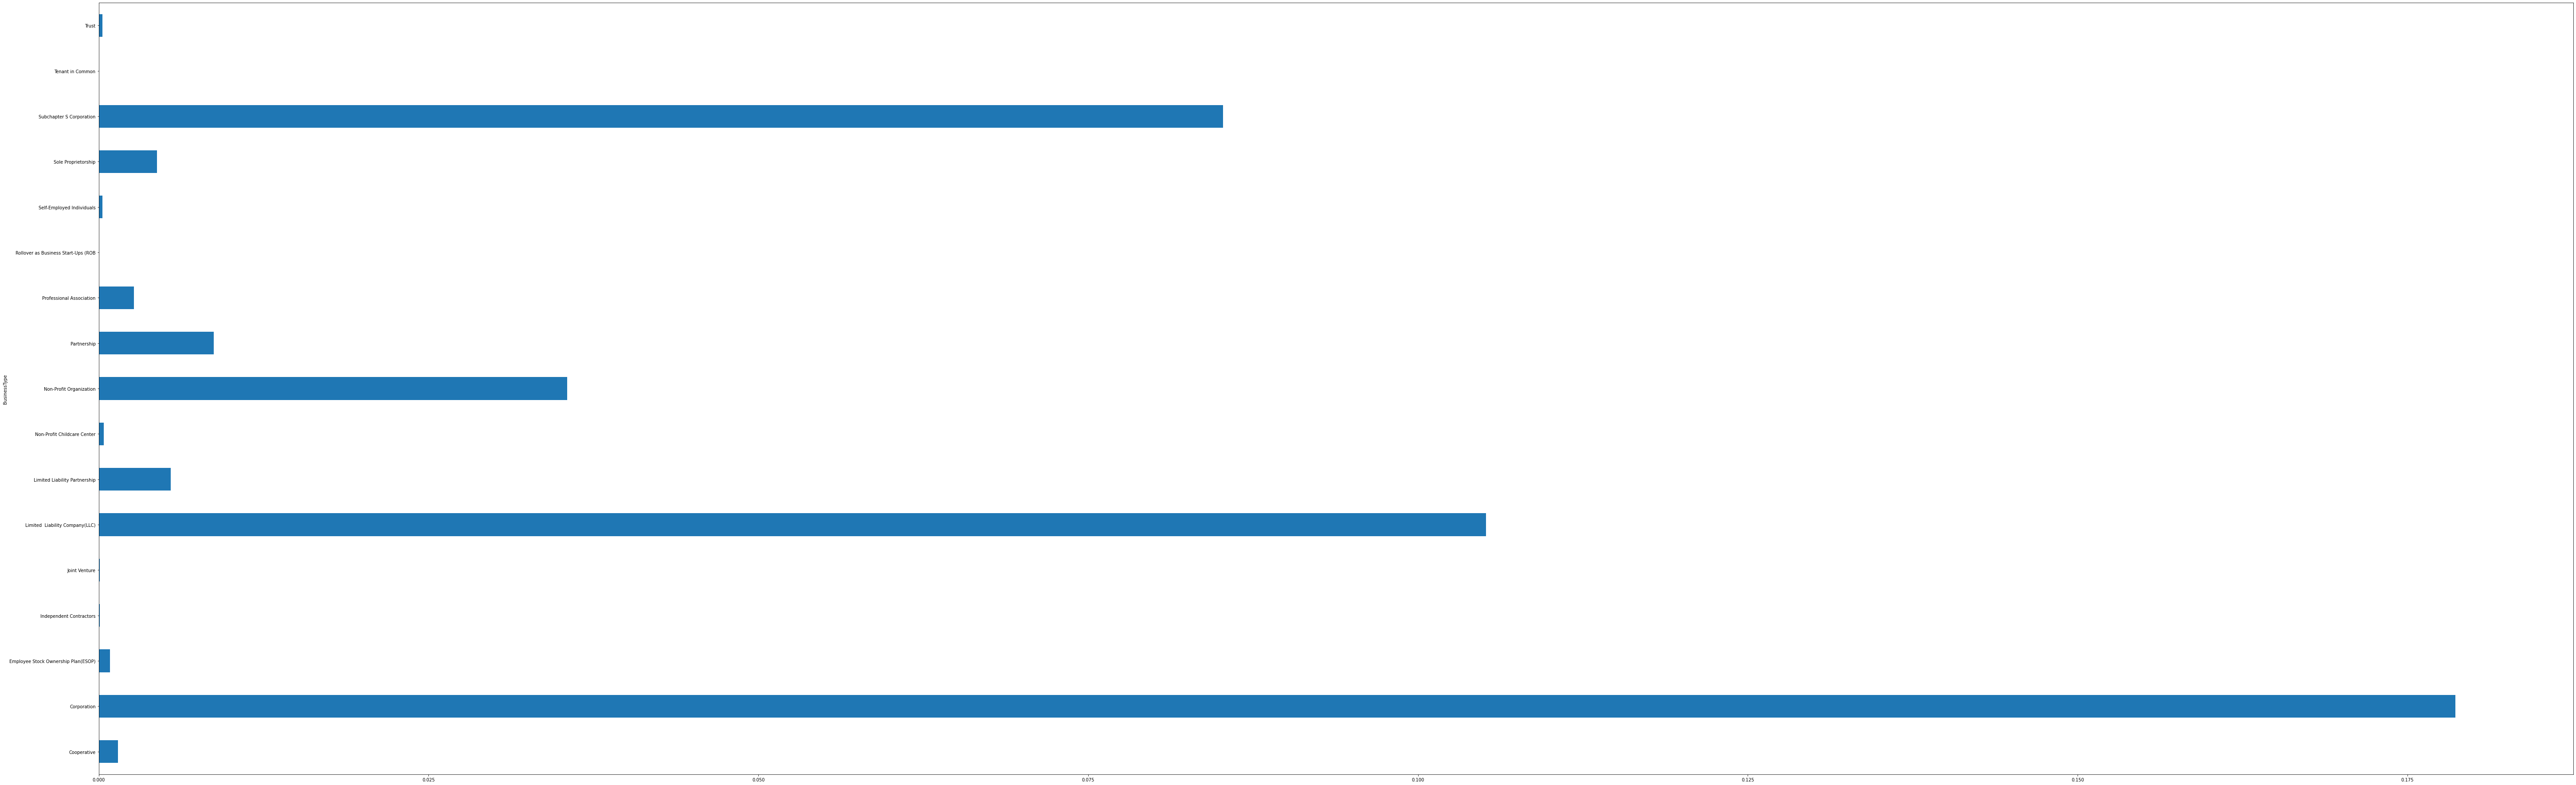

In [ ]:
plt.figure(figsize=(100,32))
df.groupby('BusinessType').apply(lambda x: np.sum(x['loan_avg']/1000000000000)).plot.barh()

AVERAGE LOAN PER BUSINESS TYPES


In [ ]:
df_loan_avg_business=pd.DataFrame(df.groupby('BusinessType').apply(lambda x: np.mean(x['loan_avg'])))
df_loan_avg_business.sort_values(by=0, ascending=False, inplace=True)
df_loan_avg_business.head()

,0
BusinessType,
Employee Stock Ownership Plan(ESOP),1.725000e+06
Trust,9.270690e+05
Non-Profit Organization,8.587062e+05
Joint Venture,8.305195e+05
Cooperative,7.841168e+05


In [ ]:
df_loan_avg_business.head()

,0
BusinessType,
Employee Stock Ownership Plan(ESOP),1.725000e+06
Trust,9.270690e+05
Non-Profit Organization,8.587062e+05
Joint Venture,8.305195e+05
Cooperative,7.841168e+05


In [ ]:
df_loan_avg_business.tail()

,0
BusinessType,
Rollover as Business Start-Ups (ROB,533333.333333
Sole Proprietorship,500559.150772
Independent Contractors,484290.540541
Tenant in Common,430952.380952
Self-Employed Individuals,399894.514768


Text(0.5, 0, 'ÄMT LOAN AVG (* 10^6)')

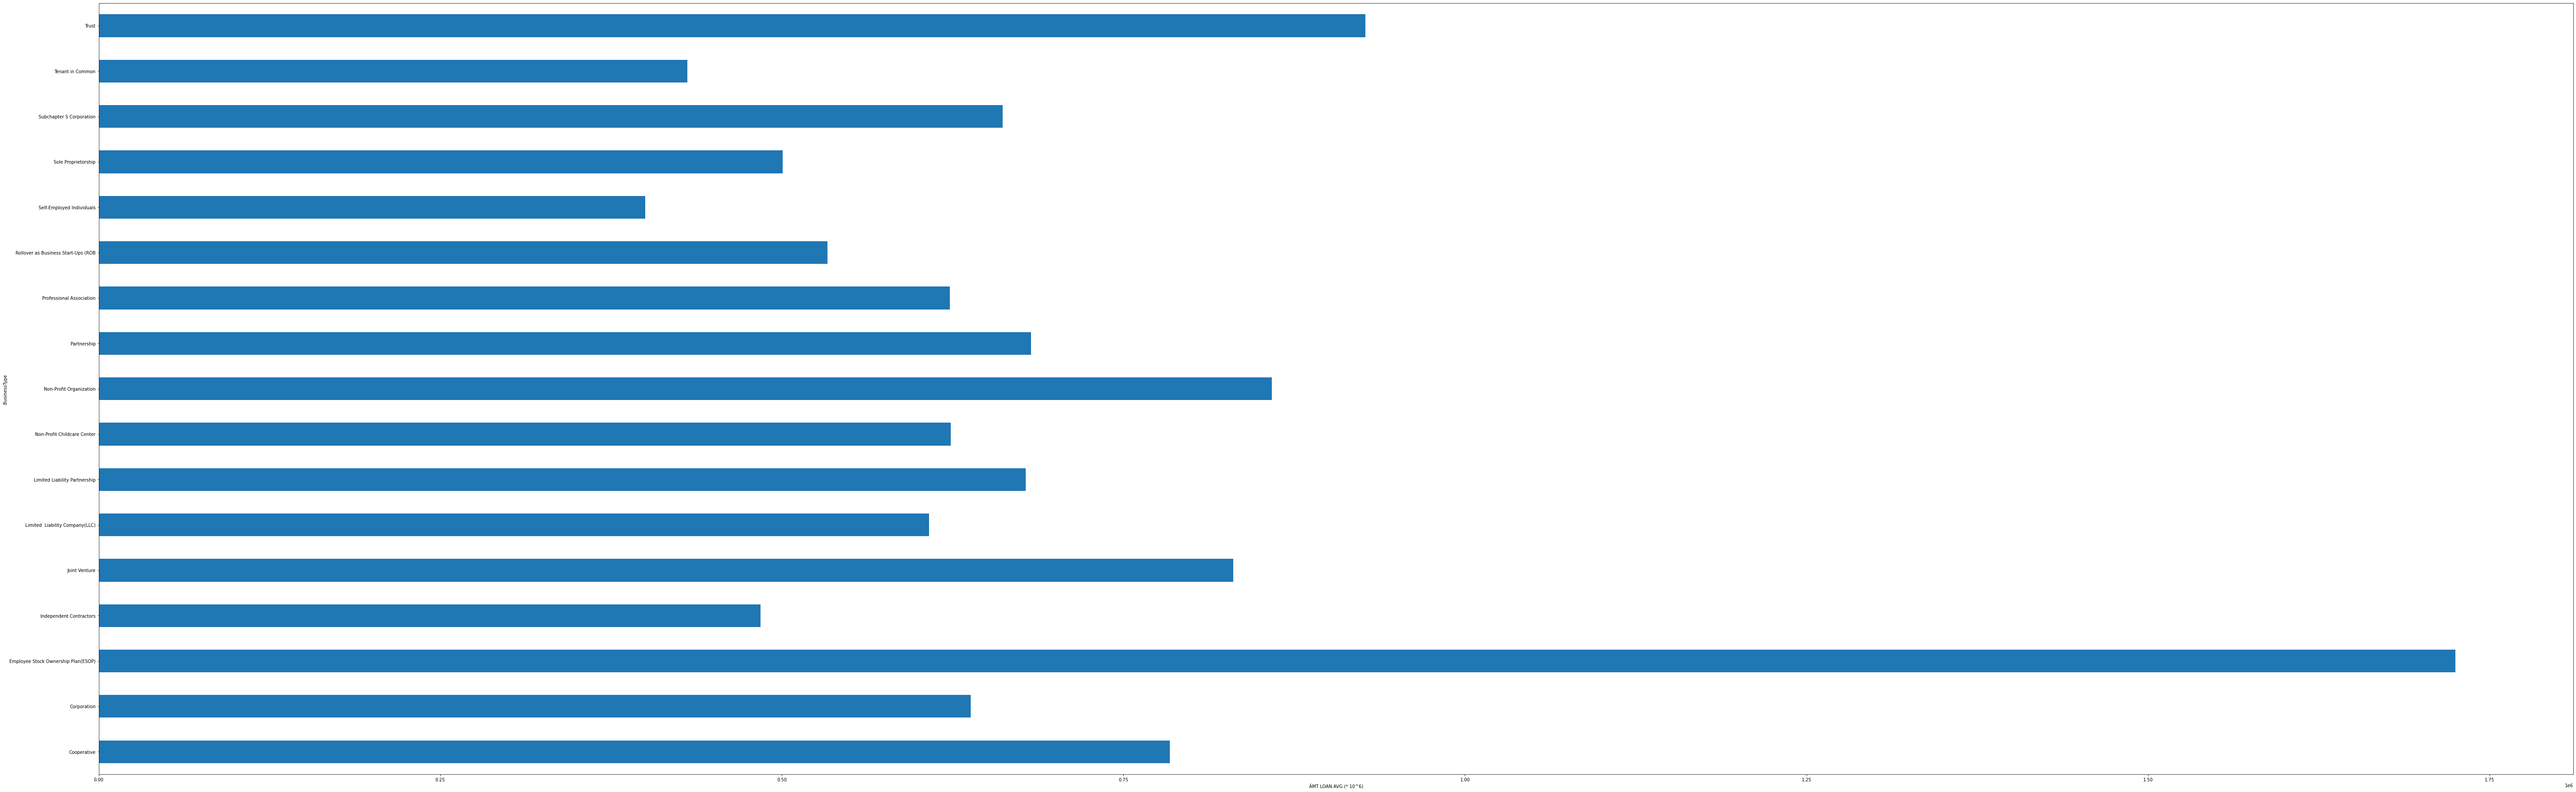

In [ ]:
plt.figure(figsize=(100,32))
df.groupby('BusinessType').apply(lambda x: np.mean(x['loan_avg'])).plot.barh()
plt.xlabel("ÄMT LOAN AVG (* 10^6)")

ANALYSIS LOAN AVG PER BUSINESS TYPE
Analysis Loan by business type

Max - 
1. Employee Stock Ownership Plan(ESOP) 	1.725000e+06
2. Trust 	9.270690e+05
3. Non-Profit Organization 	8.587062e+05
4. Joint Venture 	8.305195e+05



Minimum
1. Sole Proprietorship 	500559.150772
2. Independent Contractors 	484290.540541
3. Tenant in Common 	430952.380952
4. Self-Employed Individuals 	399894.514768

**Number of jobs reported by different business types -**



In [ ]:
df_job_per_business=pd.DataFrame(df.groupby('BusinessType').apply(lambda x: np.sum(x['JobsReported'])))
df_job_per_business.sort_values(by=0, ascending=False, inplace=True)
df_job_per_business.head()

,0
BusinessType,
Corporation,12370239.0
Limited Liability Company(LLC),8196038.0
Subchapter S Corporation,5844568.0
Non-Profit Organization,3070279.0
Partnership,611589.0


In [ ]:
df_job_per_business.head()

,0
BusinessType,
Corporation,12370239.0
Limited Liability Company(LLC),8196038.0
Subchapter S Corporation,5844568.0
Non-Profit Organization,3070279.0
Partnership,611589.0


In [ ]:
df_job_per_business.tail()

,0
BusinessType,
Self-Employed Individuals,18146.0
Joint Venture,5418.0
Independent Contractors,4632.0
Tenant in Common,589.0
Rollover as Business Start-Ups (ROB,96.0


Text(0.5, 0, 'JobsReported per business type')

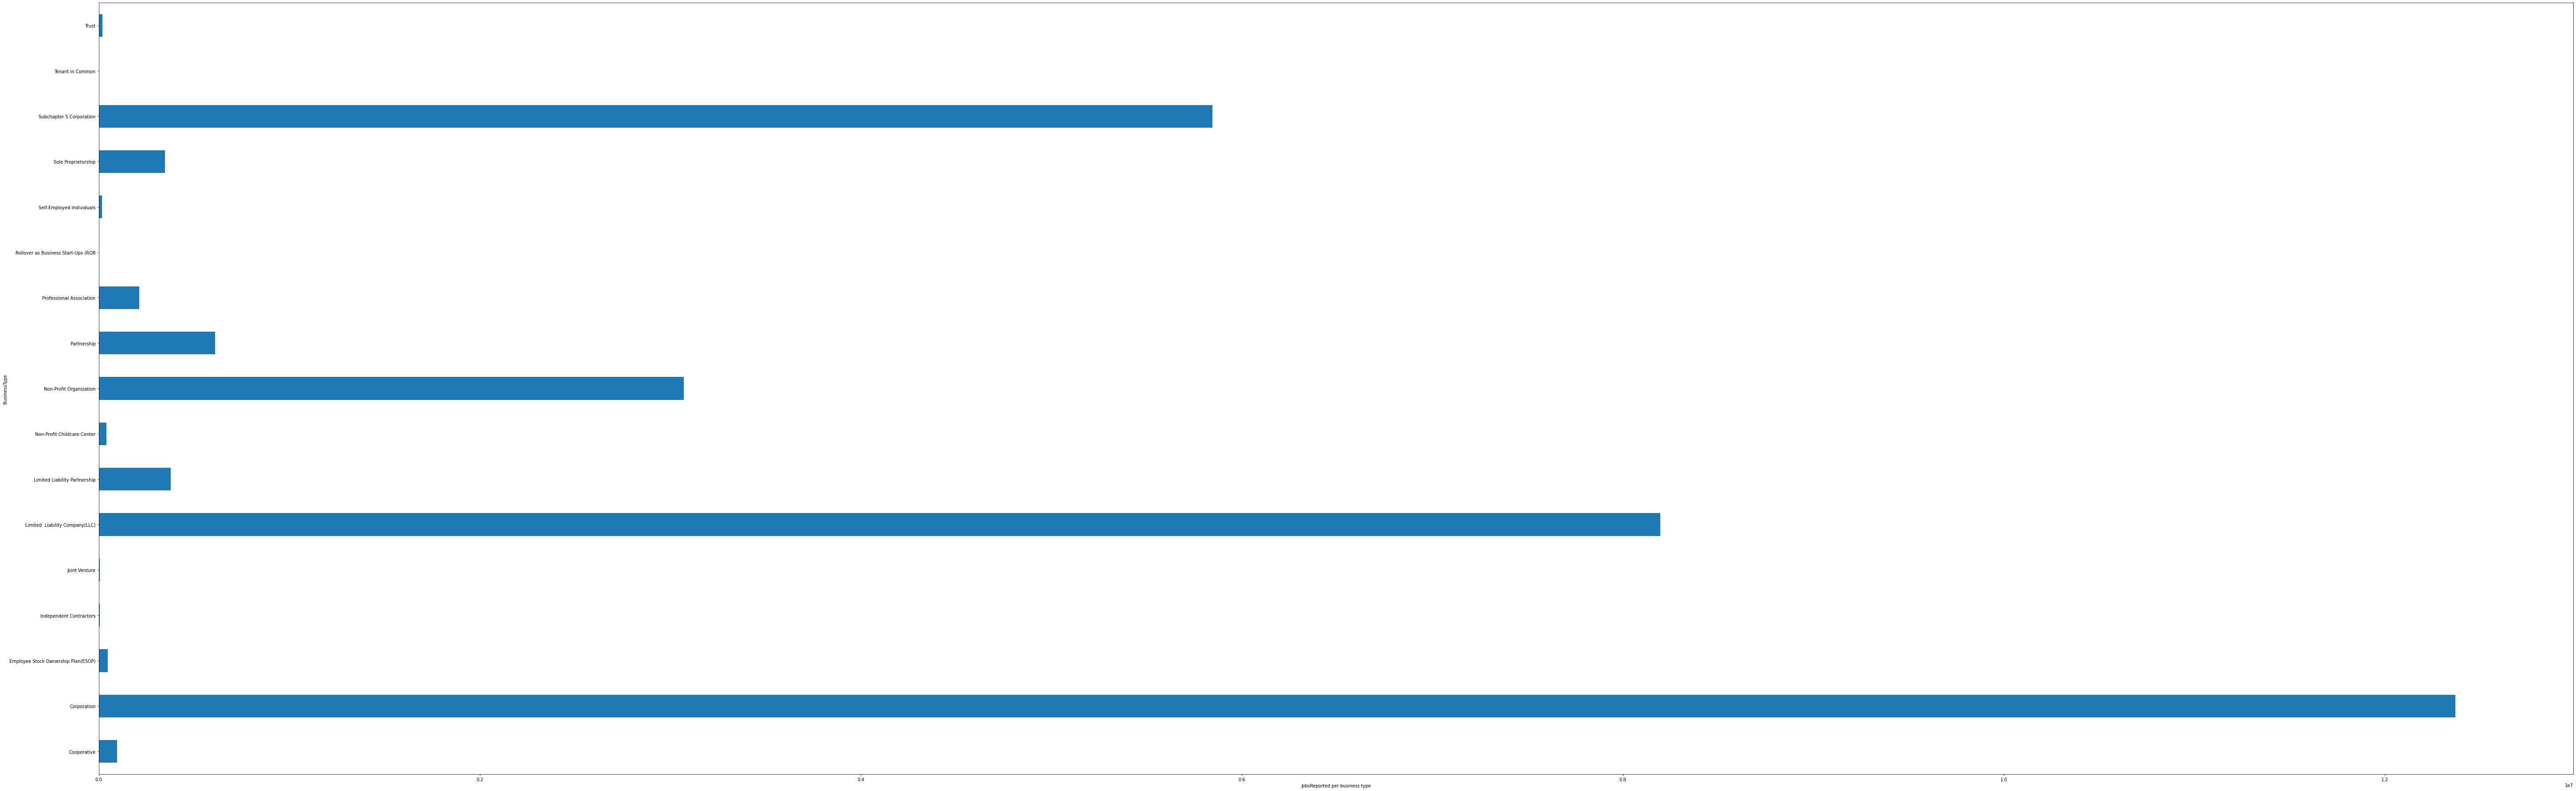

In [ ]:
plt.figure(figsize=(100,32))
df.groupby('BusinessType').apply(lambda x: np.sum(x['JobsReported'])).plot.barh()
plt.xlabel("JobsReported per business type")

NUM OF JOB REPORTED PER BUSSINESS TYPE


Max - 
1. Corporation 	12370239.0
2. Limited Liability Company(LLC) 	8196038.0
3. Subchapter S Corporation 	5844568.0
4. Non-Profit Organization 	3070279.0
5. Partnership 	611589.0



Minimum
1. Self-Employed Individuals 	18146.0
2. Joint Venture 	5418.0
3. Independent Contractors 	4632.0
4. Tenant in Common 	589.0
5. Rollover as Business Start-Ups (ROB 	96.

**Loan on basis of Race**

In [ ]:
df_loan_race=pd.DataFrame(df.groupby('RaceEthnicity').apply(lambda x: np.sum(x['"loan_avg"'])))
df_loan_race.sort_values(by=0, ascending=False, inplace=True)
df_loan_race.drop(labels="Unanswered",axis=0,inplace=True)
df_loan_race.head()

,0
RaceEthnicity,
White,4.742720e+10
Asian,3.883325e+09
Hispanic,3.496500e+09
Black or African American,1.146775e+09
American Indian or Alaska Native,3.989000e+08


In [ ]:
df_loan_race.head(4)

,0
RaceEthnicity,
White,4.742720e+10
Asian,3.883325e+09
Hispanic,3.496500e+09
Black or African American,1.146775e+09


In [ ]:
df_loan_race.tail()

,0
RaceEthnicity,
Hispanic,3.496500e+09
Black or African American,1.146775e+09
American Indian or Alaska Native,3.989000e+08
Puerto Rican,5.000000e+05
Multi Group,2.500000e+05


Analysis Loan by Race ethnicity type As per Available Data

Max - 
1. White 	4.742720e+10
2. Asian 	3.883325e+09
3. Hispanic 	3.496500e+09



Minimum
1. Black or African American 	1.146775e+09
2. American Indian or Alaska Native 	3.989000e+08
3. Puerto Rican 	5.000000e+05
4. Multi Group 	2.500000e+05

Text(0.5, 0, 'AMT')

<Figure size 2304x1152 with 0 Axes>

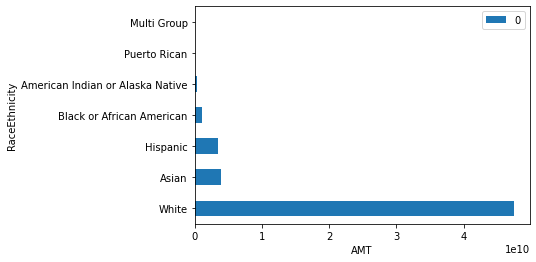

In [ ]:
plt.figure(figsize=(32,16))
df_loan_race.plot.barh()
plt.xlabel("AMT")


Loan  sum Taken BY Diffrent Gender

In [ ]:
df_loan_gender=pd.DataFrame(df.groupby('Gender').apply(lambda x: np.sum(x['loan_avg'])))
df_loan_gender.sort_values(by=0, ascending=False, inplace=True)
df_loan_gender.drop(labels="Unanswered",axis=0,inplace=True)
df_loan_gender.head()

,0
Gender,
Male Owned,9.616120e+10
Female Owned,1.648870e+10


Text(0.5, 0, 'AMT')

<Figure size 2304x1152 with 0 Axes>

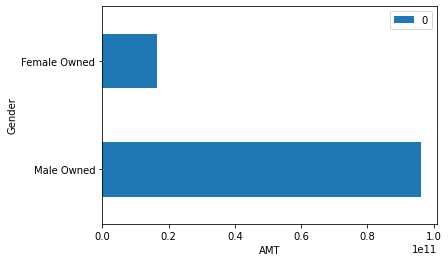

In [ ]:
plt.figure(figsize=(32,16))
df_loan_gender.plot.barh()
plt.xlabel("AMT")


Total No oF MALE AND FEMALE OWNED BUSINESS BASED ON AVAILABLE DATA

In [ ]:
df[df.Gender.notna()]["Gender"].value_counts()

Unanswered      471770
Male Owned      159496
Female Owned     31249
Name: Gender, dtype: int64

TOTAL NO OF LOANS TAKEN BY - 
1. MAN - 159496
2. FEMALE - 31249

Note -  Gender information of 471770 business is unanswered

**LOAN AMT GIVEN BY DIFFERENT LENDERS**

In [ ]:
df_loan_Lender=pd.DataFrame(df.groupby('Lender').apply(lambda x: np.sum(x['loan_avg'])))
df_loan_Lender.sort_values(by=0, ascending=False, inplace=True)
# df_loan_Lender.drop(labels="Unanswered",axis=0,inplace=True)
df_loan_Lender.head()

,0
Lender,
"JPMorgan Chase Bank, National Association",2.344588e+10
"Bank of America, National Association",1.839622e+10
"PNC Bank, National Association",1.181762e+10
Truist Bank d/b/a Branch Banking & Trust Co,1.128355e+10
KeyBank National Association,7.534700e+09


In [ ]:
df_loan_Lender.head(4)

,0
Lender,
"JPMorgan Chase Bank, National Association",2.344588e+10
"Bank of America, National Association",1.839622e+10
"PNC Bank, National Association",1.181762e+10
Truist Bank d/b/a Branch Banking & Trust Co,1.128355e+10


In [ ]:
df_loan_Lender.tail(4)

,0
Lender,
First Trust & Savings Bank,250000.0
Ripco CU,250000.0
Rio Grande Savings & Loan Association,250000.0
The First National Bank and Trust Company of Miami,250000.0


LOAN GIVEN BY DIFFERENT LENDERS 

MAX-
1. JPMorgan Chase Bank, National Association ---	      2.344588e+10
2. Bank of America, National Association        ---  	1.839622e+10
3. PNC Bank, National Association 	             ---   1.181762e+10
4. Truist Bank d/b/a Branch Banking & Trust Co 	 ---   1.128355e+10


Min -   
1. First Trust & Savings Bank 	              ---          250000.0
2. Ripco CU 	                                   ----       250000.0
3. Rio Grande Savings & Loan Association             ---- 	250000.0
4. The First National Bank and Trust Company of Miami ----	250000.0


In [102]:
df2 = df[["loan_avg","JobsReported"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


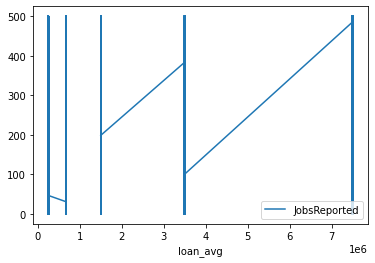

In [103]:
df2.set_index("loan_avg",inplace=True)
df2.sort_index(inplace=True)
df2.plot()

loan amount and jobs reported having non linear relationships

**DATE APPROVED:**

1. Find months in which high amount of loans were sanctioned.
2. Find how many jobs were reported in the past months and predict how many could be
reported in the upcoming months.
3. Find total number of loans approved in each month and use it for Time Series Forecasting
to predict how many loans would be approved in the upcoming months etc.

In [69]:
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,loan_lower,loan_upper,date_approved_dt,loan_avg
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN,350000,1000000,2020-05-03,675000.0
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07,350000,1000000,2020-05-03,675000.0
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31,350000,1000000,2020-05-03,675000.0
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01,350000,1000000,2020-05-03,675000.0
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05,350000,1000000,2020-05-03,675000.0


In [76]:
df_loan_month = pd.DataFrame(df[df.date_approved_dt.notna()]["date_approved_dt"].value_counts())

In [77]:
df_loan_month.columns

Index(['date_approved_dt'], dtype='object')

In [79]:
df_loan_month = pd.DataFrame(df[df.date_approved_dt.notna()]["date_approved_dt"].value_counts())
df_loan_month.sort_values(by="date_approved_dt", ascending=True, inplace=True)
# df_loan_Lender.drop(labels="Unanswered",axis=0,inplace=True)
df_loan_month.head()

,date_approved_dt
2020-07-12,5
2020-07-04,8
2020-07-11,8
2020-07-18,23
2020-07-26,29


In [92]:
df_loan_month.sort_index(inplace=True)

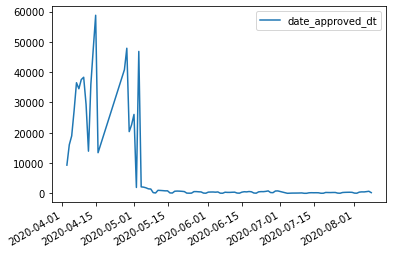

In [93]:
df_loan_month.plot()

In [81]:
df_loan_month.tail()

,date_approved_dt
2020-04-27,40795
2020-05-03,46829
2020-04-14,47657
2020-04-28,47878
2020-04-15,58759


DATES in which high amount of loans were sanctioned.
1. 2020-04-15 -----	58759
2. 2020-04-28 -----	47878
3. 2020-04-14 -----	47657
4. 2020-05-03 -----	46829
5. 2020-04-27 =----	40795


In [82]:
df['month'] = df['date_approved_dt'].dt.month

In [85]:
df_loan_month_max = pd.DataFrame(df[df.month.notna()]["month"].value_counts())
df_loan_month_max.sort_values(by="month", ascending=False, inplace=True)
# df_loan_Lender.drop(labels="Unanswered",axis=0,inplace=True)
df_loan_month_max.head()

,month
4,549046
5,94433
6,11657
7,4498
8,2881


In [86]:
df_loan_month_max.tail()

,month
4,549046
5,94433
6,11657
7,4498
8,2881


Text(0.5, 0, 'NO OF TIMES')

<Figure size 2304x1152 with 0 Axes>

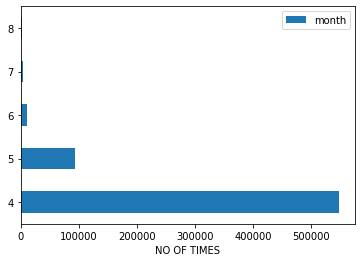

In [87]:
plt.figure(figsize=(32,16))
df_loan_month_max.plot.barh()
plt.xlabel("NO OF TIMES")

DATES in which high amount of loans were sanctioned----

1. 4(APRAIL) 	----549046
2. 5(MAY)	----94433
3. 6(JUNE)	----11657
4. 7(JULY) 	----4498
5. 8(AUGUST) 	-----2881

In [89]:
df1 = df.copy()
df1.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,loan_lower,loan_upper,date_approved_dt,loan_avg,month
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN,350000,1000000,2020-05-03,675000.0,5
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07,350000,1000000,2020-05-03,675000.0,5
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31,350000,1000000,2020-05-03,675000.0,5
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01,350000,1000000,2020-05-03,675000.0,5
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05,350000,1000000,2020-05-03,675000.0,5


In [94]:
df1.set_index("DateApproved", inplace=True)
df1.sort_index(inplace=True)
df1.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,Lender,CD,loan_lower,loan_upper,date_approved_dt,loan_avg,month
DateApproved,,,,,,,,,,,,,,,,,,,,
04/03/2020,"d $350,000-1 million",HI LINE TRUCKING INC,12931 MT HWY 16,SIDNEY,MT,59270.0,484220.0,Corporation,White,Male Owned,Non-Veteran,NaN,20.0,Stockman Bank of Montana,MT-00,350000,1000000,2020-04-03,675000.0,4
04/03/2020,c $1-2 million,"FRED DEROMA AND SON, INC.",45 Grew ave,ROSLINDALE,MA,2131.0,237310.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,NaN,60.0,The Cooperative Bank,MA-07,1000000,2000000,2020-04-03,1500000.0,4
04/03/2020,"d $350,000-1 million",SOUTH COUNTY CHRISTIAN CENTER,5001 LITTLE ROCK RD,SAINT LOUIS,MO,63128.0,813110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,78.0,Cass Commercial Bank,MO-02,350000,1000000,2020-04-03,675000.0,4
04/03/2020,c $1-2 million,"GAMIDO, LLC",15 Richards Rd,PLYMOUTH,MA,2360.0,722511.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,250.0,MutualOne Bank,MA-09,1000000,2000000,2020-04-03,1500000.0,4
04/03/2020,c $1-2 million,GANN ACADEMY-THE NEW JEWISH HIGH SCHOOL OF GRE...,333 FOREST ST,WALTHAM,MA,2452.0,611110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,35.0,"Leader Bank, National Association",MA-05,1000000,2000000,2020-04-03,1500000.0,4


In [95]:
df_job_per_date=pd.DataFrame(df1.groupby('date_approved_dt').apply(lambda x: np.sum(x['JobsReported'])))
df_job_per_date.sort_values(by=0, ascending=False, inplace=True)
# df_loan_gender.drop(labels="Unanswered",axis=0,inplace=True)
df_job_per_date.head()

,0
date_approved_dt,
2020-04-15,2771157.0
2020-04-14,2399724.0
2020-04-10,2095327.0
2020-04-09,2091576.0
2020-04-27,1972569.0


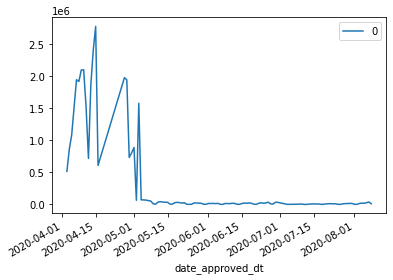

In [97]:
df_job_per_date.plot()

In [128]:
df_AK = df[df['State']=="AK"]
# df_AK.set_index("date_approved_dt",inplace=True)

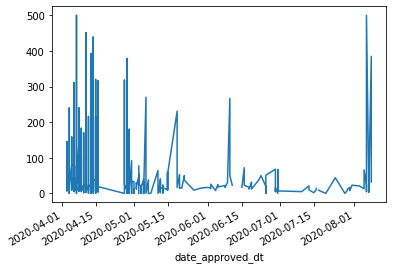

In [106]:
df_AK["JobsReported"].plot()


In [109]:
df_AK.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_AK=df_AK.dropna()

In [118]:
df_AK.isnull().sum()

LoanRange        0
BusinessName     0
Address          0
City             0
State            0
Zip              0
NAICSCode        0
BusinessType     0
RaceEthnicity    0
Gender           0
Veteran          0
NonProfit        0
JobsReported     0
DateApproved     0
Lender           0
CD               0
loan_lower       0
loan_upper       0
loan_avg         0
month            0
dtype: int64

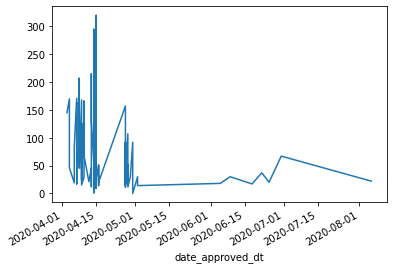

In [124]:
df_AK["JobsReported"].plot()

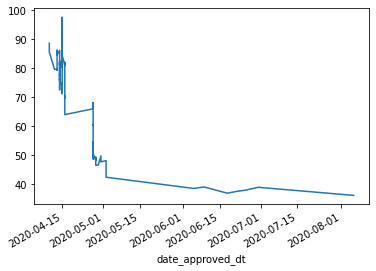

In [119]:
df_AK["JobsReported"].rolling(25).mean().plot()

In [131]:
df_AK_time = df_AK[["JobsReported","date_approved_dt"]]
df_AK_time.set_index("date_approved_dt",inplace=True)
df_AK_time.head()

,JobsReported
date_approved_dt,
2020-04-14,295.0
2020-04-11,303.0
2020-08-06,500.0
2020-04-15,215.0
2020-04-11,367.0


In [132]:
df_AK_time.sort_index(inplace=True)
df_AK_time=df_AK_time.dropna()
df_AK_time.isnull().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


JobsReported    0
dtype: int64

In [133]:
df_AK_time.head()

,JobsReported
date_approved_dt,
2020-04-03,13.0
2020-04-03,7.0
2020-04-03,35.0
2020-04-03,44.0
2020-04-03,13.0


In [136]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = df_AK["JobsReported"].rolling(25).mean()
    rolstd = df_AK["JobsReported"].rolling(25).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(df_AK_time)